#  **🌡️** **Temperature Prediction Model**

# ***📚*** **Libraries**

### A library is a package or module that contains functions, classes, and tools for specific purposes.


##  **Project Libraries Description**

This project uses several Python libraries to perform data handling, visualization, machine learning, and model storage. Below is a brief description of each:

###  `pandas`

* Helps you read, clean, and work with **structured data** (like CSV or Excel files).
* Makes it easy to organize data into tables using something called a **DataFrame**.

###  `numpy`

* Adds support for doing **math with large sets of numbers** (arrays).
* Very useful for doing fast calculations on data behind the scenes.

###  `seaborn`

* A library built on top of `matplotlib` to make **pretty charts and graphs**.
* Helps you explore patterns in your data using visualizations like heatmaps, bar plots, and more.

###  `matplotlib.pyplot`

* Lets you create **custom graphs and plots**.
* Useful for showing data trends, comparisons, or model results.

###  `sklearn.model_selection.train_test_split`

* Splits your dataset into **training** and **testing** parts.
* This helps check if your machine learning model works well on new, unseen data.

###  `sklearn.svm.SVC`

* A **machine learning model** used for **classification tasks**.
* It finds the best way to separate different groups in your data.

###  `sklearn.metrics.accuracy_score`

* Measures how **accurate your model** is by comparing predicted results with actual values.

###  `sklearn.multioutput.MultiOutputRegressor`

* Allows you to **predict multiple output values at the same time** using one model.
* Useful when your target variable has more than one column.

###  `sklearn.ensemble.RandomForestRegressor`

* A **regression model** that uses **multiple decision trees** to make more accurate predictions.
* Works well for both simple and complex problems.

###  `sklearn.pipeline.Pipeline`

* Helps you **combine steps** like preprocessing and modeling into a single workflow.
* Makes your code cleaner and more organized.

###  `sklearn.compose.ColumnTransformer`

* Lets you **apply different preprocessing** steps to different columns in your dataset.
* For example, you can encode text columns while scaling number columns.

###  `sklearn.preprocessing.OneHotEncoder`

* Converts **text categories** into **numbers** so machine learning models can understand them.

###  `joblib`

* A fast and efficient way to **save and load large machine learning models**.

###  `pickle`

* A built-in Python tool to **save any Python object**, including trained models, so you can reuse them later.
---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib
import pickle

# ****📥****  **Data Collection**

## Data Collection Description

The weather data used in this project is sourced from a CSV file named **`pakistan_weather_2000_2024.csv`** , which contains historical weather information for Pakistan from the years 2000 to 2024 .

To handle this data, a dedicated class is created that:

*  Loads the dataset from the specified CSV file into a pandas DataFrame.
*  Provides basic insights about the dataset by displaying:

  *  Details on the dataset’s structure, such as column names, data types, and the count of available (non-missing) data points.
  *  A sample of the first few rows to give a quick look at the data entries.

This approach makes it easy to access, examine, and work with the weather data throughout the project..

In [2]:
class DataCollector:
    def __init__(self, source_path):
        '''
        Initializes the DataCollector class with the path to the dataset.

        Parameters:
        source_path (str): The file path to the CSV dataset.
        '''
        self.source_path = "pakistan_weather_2000_2024.csv" 
        self.data = None  

    def load_data(self):
        '''
        Loads the dataset from the specified CSV file using pandas.

        Returns:
        DataFrame: The loaded dataset stored in self.data.
        '''
        self.data = pd.read_csv(self.source_path)
        print(f"Data loaded successfully from {self.source_path}")
        return self.data

    def get_data_summary(self):
        '''
        Prints a summary of the dataset:
        - Info about columns, types, and non-null counts
        - First 5 rows of the dataset for preview
        '''
        if self.data is None:
            print("Data not loaded yet. Please run load_data() first.")
            return
        print("Data Info:")
        print(self.data.info())  
        print("\nFirst 5 rows:")
        print(self.data.head())  

collector = DataCollector('pakistan_weather_2000_2024.csv')  

data = collector.load_data()                              
collector.get_data_summary()                               



Data loaded successfully from pakistan_weather_2000_2024.csv
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31779 entries, 0 to 31778
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                31779 non-null  object 
 1   year                31779 non-null  int64  
 2   month               31779 non-null  int64  
 3   day                 31779 non-null  int64  
 4   dayofweek           31779 non-null  int64  
 5   is_weekend          31779 non-null  int64  
 6   season              31779 non-null  object 
 7   city                31779 non-null  object 
 8   region              31779 non-null  object 
 9   latitude            31779 non-null  float64
 10  longitude           31779 non-null  float64
 11  elevation           31779 non-null  int64  
 12  tmin                31779 non-null  float64
 13  tmax                31779 non-null  float64
 14  tavg                31779 non-

# 🔍 **Data Understanding**

## Data Understanding Description

- **Explore dataset structure:** Check the number of rows and columns.
- **Inspect data types:** Understand the kind of data in each column (e.g., numbers, dates, categories).
- **Identify missing values:** Find columns with incomplete or missing data.
- **View statistical summaries:** Get basic stats like mean, min, max, and count for numerical and categorical data.
- **Examine unique values:** Discover distinct entries in specific columns to better understand categorical variables.
- **Prepare for next steps:** Use these insights to guide data cleaning and preprocessing.


In [3]:
class DataUnderstanding:
    def __init__(self, data):

        '''
        This function runs when we create the class.
        It saves the dataset and stores a list of column names 
        that we expect to work with.
        '''

        self.data = data
        self.columns = [
            'date', 'year', 'month', 'day', 'dayofweek', 'is_weekend',
            'season', 'city', 'region', 'latitude', 'longitude', 'elevation',
            'tmin', 'tmax', 'tavg', 'prcp', 'wspd', 'humidity', 'pressure',
            'dew_point', 'cloud_cover', 'visibility'
        ]

    def overview(self):

        '''
        Shows basic information about the dataset:
        - How many rows and columns it has
        - What type of data is in each column
        - How many missing (empty) values are in each column
        - A summary of numbers (like averages and min/max values)
        '''

        print("Shape of the data:", self.data.shape)
        print("\nData types:\n", self.data.dtypes)
        print("\nMissing values:\n", self.data.isnull().sum())
        print("\nStatistical summary:\n", self.data.describe(include='all'))

    def unique_values(self, column):

        '''
        Shows all the unique values in a specific column.
        we just give it the column name, like 'city' or 'month'.
        If the column name is not correct, it tells us.
        '''

        if column in self.columns:
            unique_vals = self.data[column].unique()
            print(f"Unique values in '{column}':\n{unique_vals}")
        else:
            print(f"Column '{column}' does not exist in the dataset.\nAvailable columns: {self.columns}")

understanding = DataUnderstanding(data)

understanding.overview()
understanding.unique_values('city')
understanding.unique_values('month')

Shape of the data: (31779, 27)

Data types:
 date                   object
year                    int64
month                   int64
day                     int64
dayofweek               int64
is_weekend              int64
season                 object
city                   object
region                 object
latitude              float64
longitude             float64
elevation               int64
tmin                  float64
tmax                  float64
tavg                  float64
prcp                  float64
wspd                  float64
humidity                int64
pressure              float64
dew_point             float64
cloud_cover             int64
visibility            float64
temp_range            float64
is_hot_day              int64
is_cold_day             int64
rainfall_intensity     object
wind_category          object
dtype: object

Missing values:
 date                      0
year                      0
month                     0
day                       0
d


Statistical summary:
             date          year         month           day     dayofweek  \
count      31779  31779.000000  31779.000000  31779.000000  31779.000000   
unique      9132           NaN           NaN           NaN           NaN   
top     1/1/2000           NaN           NaN           NaN           NaN   
freq           4           NaN           NaN           NaN           NaN   
mean         NaN   2011.103370      6.522609     15.730577      3.000063   
std          NaN      7.176794      3.448845      8.800627      2.000267   
min          NaN   2000.000000      1.000000      1.000000      0.000000   
25%          NaN   2005.000000      4.000000      8.000000      1.000000   
50%          NaN   2010.000000      7.000000     16.000000      3.000000   
75%          NaN   2017.000000     10.000000     23.000000      5.000000   
max          NaN   2024.000000     12.000000     31.000000      6.000000   

          is_weekend  season       city  region      latitude  .

## 🧹 **Data Preprocessing**

##  Data Preprocessing Description

In this step, we prepare the raw weather dataset for machine learning by cleaning and transforming it through a series of operations. A dedicated class `DataPreprocessing` is used to make this process modular and reusable.

### Key Tasks Performed:

1. **Initialize the Preprocessing Class:**
   The class is initialized with the original dataset.

2. **Drop Unnecessary Columns:**
   Columns that are not useful for model training (e.g., `date`) are removed to reduce noise.

3. **Handle Missing Numeric Values:**
   For numerical columns like `tavg`, `tmin`, `tmax`, `prcp`, and `wspd`, missing values are filled using the **mean** of each column.

4. **Handle Missing Categorical Values:**
   For categorical data (e.g., `city`), missing entries are filled using the **most frequent value (mode)**.

5. **Encode Categorical Columns:**
   Categorical columns (e.g., `city`) are converted into **one-hot encoded** format so they can be used in machine learning models.

6. **Normalize Numerical Columns:**
   Selected numeric columns are scaled to a range of **0 to 1** using **Min-Max normalization**, ensuring all features contribute equally to model training.

### Final Output:

After processing, the cleaned and transformed dataset is stored in `processed_data` and is ready for training a machine learning model.

In [4]:
class DataPreprocessing:
    def __init__(self, data):
        '''
        Initializes the DataPreprocessing class with the provided DataFrame.
        '''
        self.data = data

    def drop_columns(self, columns):
        '''
        Drops specified columns from the dataset.
        '''
        self.data = self.data.drop(columns=columns)

    def fill_missing_with_mean(self, columns):
        '''
        Fills missing values in the specified numeric columns using the column mean.
        '''
        for col in columns:
            mean_val = self.data[col].mean()
            self.data[col] = self.data[col].fillna(mean_val)

    def fill_missing_with_mode(self, columns):
        '''
        Fills missing values in the specified categorical columns using the column mode.
        '''
        for col in columns:
            mode_val = self.data[col].mode()[0]
            self.data[col] = self.data[col].fillna(mode_val)

    def encode_categorical(self, columns):
        '''
        Converts categorical columns into one-hot encoded (dummy) variables.
        '''
        self.data = pd.get_dummies(self.data, columns=columns)

    def normalize_columns(self, columns):
        '''
        Applies Min-Max normalization to scale numeric columns to the range [0, 1].

        '''
        for col in columns:
            min_val = self.data[col].min()
            max_val = self.data[col].max()
            self.data[col] = (self.data[col] - min_val) / (max_val - min_val)

'''
The steps involve in data preprocessing are:
1-Initialize preprocessing object
2-Drop unnecessary columns (example: dropping 'Date' if not needed for modeling)
3-Fill missing numeric values with mean
4-Fill missing categorical values with mode
5-Encode categorical column
6-Normalize numerical columns
'''

preprocessor = DataPreprocessing(data)
preprocessor.drop_columns(['date'])
preprocessor.fill_missing_with_mean(['tavg', 'tmin', 'tmax', 'prcp', 'wspd'])
preprocessor.fill_missing_with_mode(['city'])
preprocessor.encode_categorical(['city'])
preprocessor.normalize_columns(['tavg', 'tmin', 'tmax', 'prcp', 'wspd'])

''' Access the final cleaned and preprocessed dataset and preview first few rows'''
processed_data = preprocessor.data
print(processed_data.head())



   year  month  day  dayofweek  is_weekend  season  region  latitude  \
0  2000      1    1          5           1  Winter  Punjab   33.6844   
1  2000      1    2          6           1  Winter  Punjab   33.6844   
2  2000      1    3          0           0  Winter  Punjab   33.6844   
3  2000      1    4          1           0  Winter  Punjab   33.6844   
4  2000      1    5          2           0  Winter  Punjab   33.6844   

   longitude  elevation  ...  is_hot_day  is_cold_day  rainfall_intensity  \
0    73.0479        540  ...           0            0                none   
1    73.0479        540  ...           0            0                none   
2    73.0479        540  ...           0            0                none   
3    73.0479        540  ...           0            0                none   
4    73.0479        540  ...           0            0                none   

   wind_category  city_Gilgit  city_Islamabad  city_Karachi  city_Lahore  \
0          windy        Fals

## 📊 **Univariate analysis**

**Univariate analysis** is the process of analyzing and visualizing one variable (column) at a time. It helps in understanding the distribution, frequency, and central tendency of individual features in the dataset.

## Univariate Analysis Description
In this project, the `UnivariateAnalysis` class is created to perform such analysis on the weather dataset. Here's what each method does:

### What We Analyze

* **Records per Month:**

  * A bar chart shows how many weather records exist for each month.
  * Helps identify seasonal patterns or data imbalances across months.

* **Records per City (Pie Chart):**

  * A pie chart displays the proportion of data contributed by each city.
  * Useful for understanding city-wise data distribution.

* **Average Temperature (Box Plot):**

  * A box plot visualizes the distribution of average temperature (`tavg`).
  * Highlights central values, variability, and potential outliers.


### Why It's Important

* Detects **imbalanced data** across cities or months.
* Helps identify **outliers** or unusual temperature patterns.
* Provides initial insights into the data for **feature selection** and **model design**.



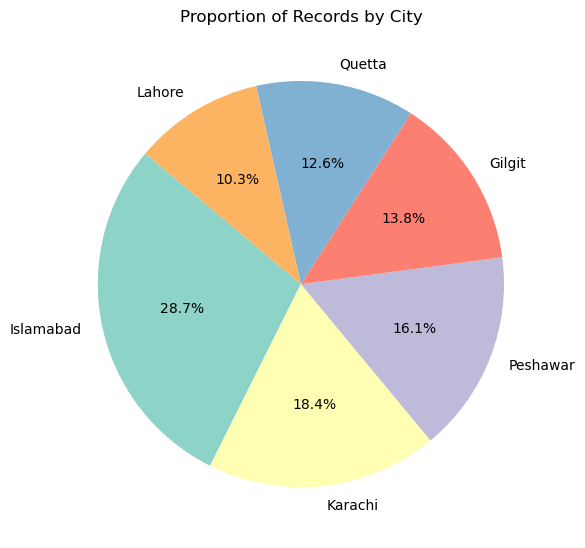

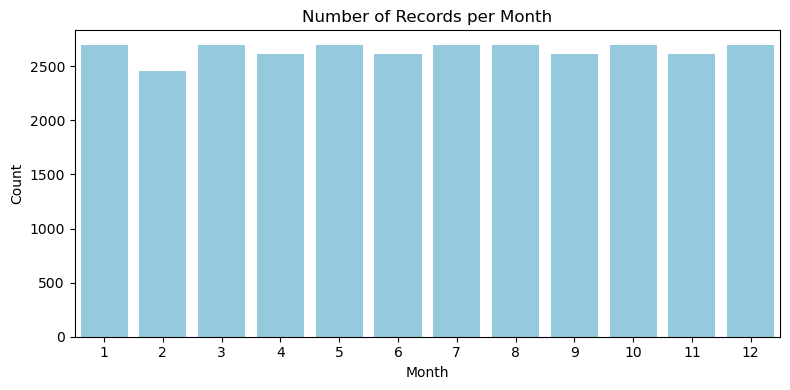

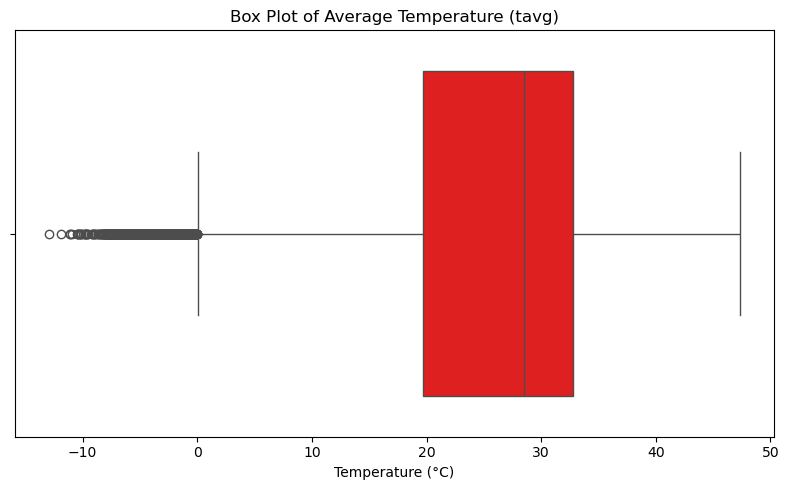

In [5]:
class UnivariateAnalysis:
    def __init__(self, data):
        self.data = data

    def plot_records_per_month(self):

        ''' Bar Chart: Number of Records per Month'''

        plt.figure(figsize=(8, 4))
        sns.countplot(x='month', data=self.data, color='skyblue')  
        plt.title('Number of Records per Month')
        plt.xlabel('Month')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

    def plot_records_per_city_pie(self):

        '''Pie Chart: Proportion of Records by City'''

        city_counts = self.data['city'].value_counts()  # Count how many records per city
        plt.figure(figsize=(6, 6))
        plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140,
                colors=sns.color_palette('Set3'))
        plt.title('Proportion of Records by City')
        plt.tight_layout()
        plt.show()

    def box_plot_tavg(self):
        
        ''' Box Plot: Average Temperature (tavg)'''
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.data['tmax'], color='red')  # Create box plot of temperature
        plt.title('Box Plot of Average Temperature (tavg)')
        plt.xlabel('Temperature (°C)')
        plt.tight_layout()
        plt.show()

uni = UnivariateAnalysis(data)          
uni.plot_records_per_city_pie()         
uni.plot_records_per_month()            
uni.box_plot_tavg()                     


## 📊 **Bivariate Analysis**

## Bivariate Analysis Description

**Bivariate analysis** explores the relationship between two variables. It helps uncover patterns, trends, or correlations that may exist when two features interact with each other.

In this project, the `BivariateAnalysis` class is created to examine how different pairs of weather-related features are connected. Here's what each method visualizes:

### What We Analyze

* **City vs Average Temperature (Box Plot):**

  * A box plot shows the distribution of average temperature (`tavg`) for each city.
  * Useful for comparing climate differences across various locations.

* **Month vs Temperature (Scatter Plot):**

  * A scatter plot displays how temperature changes over the months.
  * Helps detect seasonal trends in temperature.

* **Month & Year vs Temperature (Heatmap):**

  * A heatmap shows how average temperatures vary by both month and year.
  * Useful for visualizing long-term temperature trends and anomalies.

### Why It's Important

* Reveals **relationships and trends** between time, location, and weather conditions.
* Supports **hypothesis building** and deeper understanding of the dataset.
* Aids in **feature selection** by showing useful or redundant variables.
* Helps tailor models that are aware of **seasonal** or **geographic effects**.

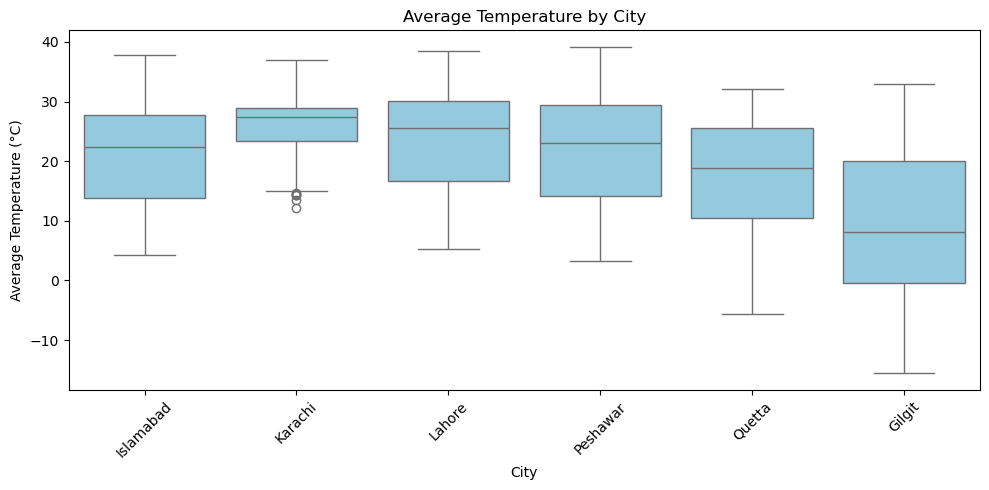

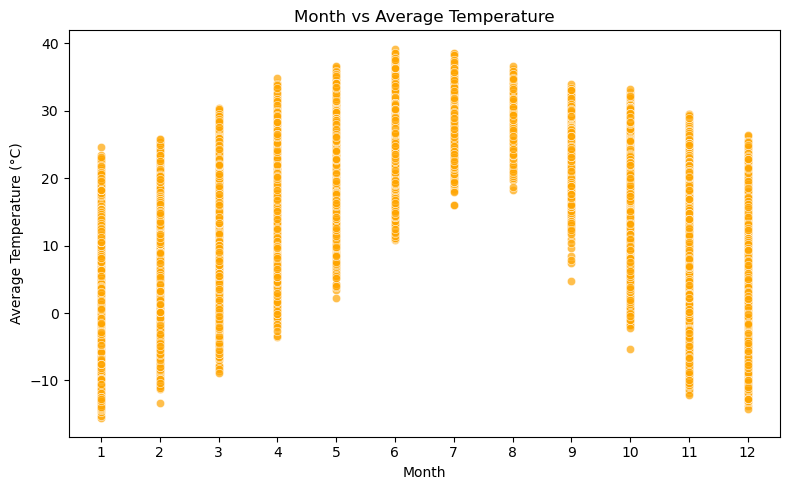

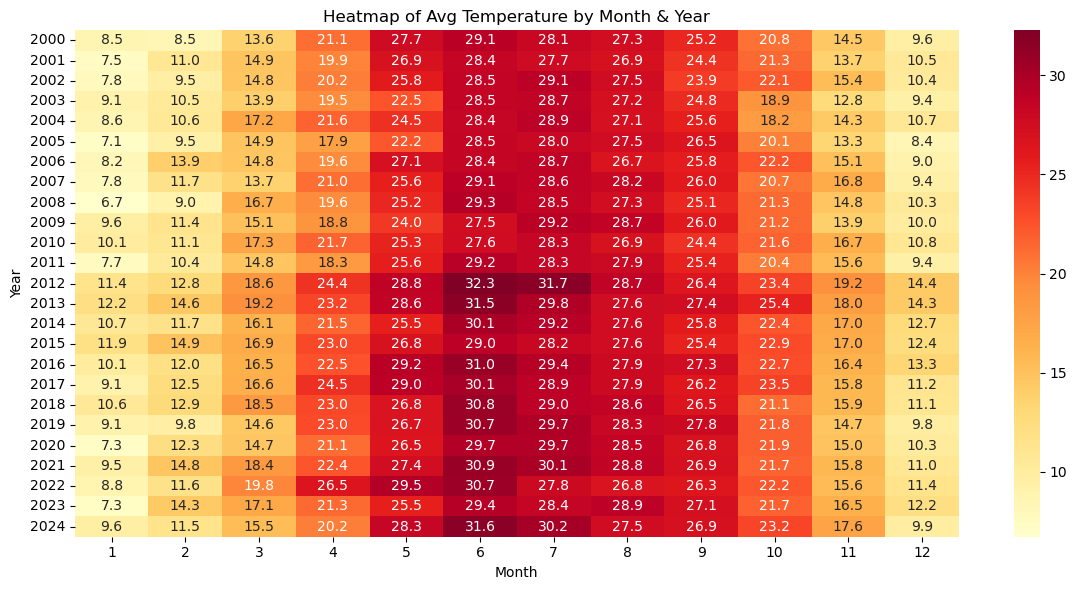

In [6]:
class BivariateAnalysis:
    def __init__(self, data):
        self.data = data

    def box_plot_city_temp(self):
        '''Box Plot: City vs Average Temperature (fixed warning)'''
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='city', y='tavg', data=self.data, color='skyblue')  
        plt.title('Average Temperature by City')
        plt.xlabel('City')
        plt.ylabel('Average Temperature (°C)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def scatter_month_temp(self):
        '''Scatter Plot: Month vs Average Temperature'''
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x='month', y='tavg', data=self.data, color='orange', alpha=0.7)
        plt.title('Month vs Average Temperature')
        plt.xlabel('Month')
        plt.ylabel('Average Temperature (°C)')
        plt.xticks(ticks=range(1, 13))
        plt.tight_layout()
        plt.show()

    def heatmap_month_year_temp(self):
        '''Heatmap: Average Temperature by Month and Year'''
        pivot_table = self.data.pivot_table(values='tavg', index='year', columns='month', aggfunc='mean')
        plt.figure(figsize=(12, 6))
        sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlOrRd')
        plt.title('Heatmap of Avg Temperature by Month & Year')
        plt.xlabel('Month')
        plt.ylabel('Year')
        plt.tight_layout()
        plt.show()

biv = BivariateAnalysis(data)

biv.box_plot_city_temp()
biv.scatter_month_temp()
biv.heatmap_month_year_temp()


## **Data spilting, Model Training and saving by using PKL**



## 🔧 **Temperature Model Trainer – Code Description**

This Python class handles the complete workflow for training a machine learning model to predict minimum, maximum, and average temperatures using historical weather data.

###  **Class Structure & Workflow**

#### 1. **Initialization**

* Defines the CSV file path.
* Sets feature and target columns.
* Prepares placeholders for data, preprocessing pipeline, and model.

#### 2. **Data Loading**

* Reads data from the CSV file (`pakistan_weather_2000_2024.csv`).
* Extracts feature columns (`X`) and target columns (`y`).

#### 3. **Preprocessing**

* Uses `OneHotEncoder` for categorical columns (`city`, `season`).
* Leaves numerical columns unchanged using `ColumnTransformer`.

#### 4. **Model Building**

* Builds a machine learning pipeline that includes:

  * Preprocessing steps.
  * A `RandomForestRegressor` wrapped in `MultiOutputRegressor` to predict `tmin`, `tmax`, and `tavg` together.

#### 5. **Data Splitting & Model Training**

* Splits the data into training and testing sets using `train_test_split`.
* Trains the model pipeline on the training data.
* Saves the trained model to the `self.model` variable.
* Prints a success message upon completion.

#### 6. **Model Saving**

* Saves the trained model to a file (`temperature_predictor_v2.pkl`) using `joblib`.
* Ensures the model can be reused later without retraining.

###  **Main Execution Flow**

When the script is run directly:

* An instance of the `TemperatureModelTrainer` class is created.
* The dataset is loaded from the CSV file.
* Data preprocessing is configured.
* The machine learning model is built using a pipeline.
* The dataset is split into training and testing sets.
* The model is trained on the training data.
* Finally, the trained model is saved as a `.pkl` file for future use.
  
This streamlined process ensures the model is fully prepared and stored with just one script execution.


In [7]:
class TemperatureModelTrainer:
    def __init__(self, csv_path):
        '''
        Initializes key attributes:
        Sets the path to the CSV file (pakistan_weather_2000_2024.csv).
        Lists the input features (like city, date, humidity, etc.).
        Defines target variables: tmin, tmax, tavg.
        Prepares placeholders for the dataset, model, and preprocessing tools
        '''

        self.csv_path = "pakistan_weather_2000_2024.csv"
        self.model = None
        self.features = [
            'city', 'year', 'month', 'day',
            'latitude', 'longitude', 'elevation',
            'season', 'humidity', 'dew_point',
            'pressure', 'cloud_cover', 'wspd'
        ]
        self.targets = ['tmin', 'tmax', 'tavg']
        self.categorical_cols = ['city', 'season']
        self.df = None
        self.X = None
        self.y = None
        self.preprocessor = None
        self.pipeline = None

    '''
    Reads the weather data CSV using pandas.
    Stores the input features in self.X and target temperature values in self.y.
    Prints the first few rows of the dataset to verify successful loading.
    '''
    def load_data(self):
        self.df = pd.read_csv(self.csv_path)
        print(self.df.head())  
        self.X = self.df[self.features]
        self.y = self.df[self.targets]

    '''
    Sets up a data preprocessing pipeline using ColumnTransformer:
    Applies OneHotEncoding to categorical columns: city and season.
    Leaves all other (numerical) columns as they are (remainder='passthrough').
    '''
    def preprocess(self):
        self.preprocessor = ColumnTransformer([
            ('cat', OneHotEncoder(handle_unknown='ignore'), self.categorical_cols)
        ], remainder='passthrough')

    '''
    Builds a machine learning pipeline that:
    Applies the preprocessing step.
    Trains a RandomForestRegressor inside a MultiOutputRegressor to predict all three temperature values (tmin, tmax, tavg) at once.
    '''
    def build_model(self):
        self.pipeline = Pipeline([
            ('preprocessor', self.preprocessor),
            ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=42)))
        ])

    '''
    Splits the dataset into training and testing sets.
    Fits the model (pipeline) on the training data.
    Saves the trained model to self.model.
    Prints a confirmation message after training is complete.
    '''
    def train(self, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )
        self.pipeline.fit(X_train, y_train)
        self.model = self.pipeline
        print("Model training complete.")

    '''
    Saves the trained model to disk using joblib for later use.
    Default filename: temperature_predictor_v2.pkl.
    Prints a message to confirm that the model was saved.
    '''
    def save_model(self, file_name='temperature_predictor_v2.pkl'):
        joblib.dump(self.model, file_name)
        print(f"Model saved as '{file_name}'")

    '''
    The main block executes the training process in the correct order:
    Load the data
    Preprocess the data
    Build the model
    Train the model
    Save the model using pkl
    '''
    
if __name__ == "__main__":
    trainer = TemperatureModelTrainer("pakistan_weather_2000_2024.csv")
    trainer.load_data()
    trainer.preprocess()
    trainer.build_model()
    trainer.train()
    trainer.save_model()

       date  year  month  day  dayofweek  is_weekend  season       city  \
0  1/1/2000  2000      1    1          5           1  Winter  Islamabad   
1  1/2/2000  2000      1    2          6           1  Winter  Islamabad   
2  1/3/2000  2000      1    3          0           0  Winter  Islamabad   
3  1/4/2000  2000      1    4          1           0  Winter  Islamabad   
4  1/5/2000  2000      1    5          2           0  Winter  Islamabad   

   region  latitude  ...  humidity  pressure  dew_point  cloud_cover  \
0  Punjab   33.6844  ...        76    1018.9        4.8            0   
1  Punjab   33.6844  ...        77    1018.6        4.8            0   
2  Punjab   33.6844  ...        76    1016.8        5.0            0   
3  Punjab   33.6844  ...        75    1016.2        4.8            0   
4  Punjab   33.6844  ...        77    1017.5        5.3            0   

   visibility  temp_range  is_hot_day  is_cold_day  rainfall_intensity  \
0         NaN        14.1           0     